<a href="https://colab.research.google.com/github/mimansha98/Atmospheric-factors-prediction-through-Machine-Learning/blob/main/Wind%20Speed%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [59]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [60]:
dataframe = pd.read_excel('weatherdata (11).xlsx')
dataframe

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Princeton, OR, United States",12/01/2020,3.9,-12.5,-5.5,-18.3,NaN,0.0,0.00,47.69,13.0,90.43,NaN,15.4,5.0,77.53,Clear
1,"Princeton, OR, United States",12/02/2020,5.0,-12.1,-3.3,-17.0,NaN,0.0,0.00,45.69,35.3,111.67,53.6,16.0,0.0,64.23,Clear
2,"Princeton, OR, United States",12/03/2020,5.7,-11.6,-3.7,-16.2,NaN,0.0,0.00,44.69,22.3,172.08,NaN,16.0,0.0,63.18,Clear
3,"Princeton, OR, United States",12/04/2020,6.2,-13.3,-5.1,-18.9,NaN,0.0,0.58,44.34,11.2,101.67,NaN,16.0,0.0,67.18,Snow
4,"Princeton, OR, United States",12/05/2020,5.7,-13.8,-5.1,-19.6,NaN,0.0,0.35,44.69,18.4,173.48,NaN,15.9,4.0,66.86,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"Princeton, OR, United States",02/06/2021,8.8,-6.6,0.7,-4.0,NaN,0.0,0.65,113.17,31.7,273.08,51.8,16.0,0.0,68.83,Snow
68,"Princeton, OR, United States",02/07/2021,6.7,-5.0,1.0,-8.0,NaN,0.0,0.00,111.17,29.5,250.45,40.7,16.0,0.0,60.21,Clear
69,"Princeton, OR, United States",02/08/2021,3.9,-7.1,-2.3,-11.0,NaN,0.0,0.00,0.00,13.0,180.91,NaN,16.0,10.8,74.51,Clear
70,"Princeton, OR, United States",02/09/2021,8.9,-2.1,1.4,-7.0,NaN,0.0,0.00,0.00,20.5,229.00,NaN,16.0,37.5,59.70,Partially cloudy


In [61]:
dataframe = dataframe[0:75]
dataframe

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Princeton, OR, United States",12/01/2020,3.9,-12.5,-5.5,-18.3,NaN,0.0,0.00,47.69,13.0,90.43,NaN,15.4,5.0,77.53,Clear
1,"Princeton, OR, United States",12/02/2020,5.0,-12.1,-3.3,-17.0,NaN,0.0,0.00,45.69,35.3,111.67,53.6,16.0,0.0,64.23,Clear
2,"Princeton, OR, United States",12/03/2020,5.7,-11.6,-3.7,-16.2,NaN,0.0,0.00,44.69,22.3,172.08,NaN,16.0,0.0,63.18,Clear
3,"Princeton, OR, United States",12/04/2020,6.2,-13.3,-5.1,-18.9,NaN,0.0,0.58,44.34,11.2,101.67,NaN,16.0,0.0,67.18,Snow
4,"Princeton, OR, United States",12/05/2020,5.7,-13.8,-5.1,-19.6,NaN,0.0,0.35,44.69,18.4,173.48,NaN,15.9,4.0,66.86,Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"Princeton, OR, United States",02/06/2021,8.8,-6.6,0.7,-4.0,NaN,0.0,0.65,113.17,31.7,273.08,51.8,16.0,0.0,68.83,Snow
68,"Princeton, OR, United States",02/07/2021,6.7,-5.0,1.0,-8.0,NaN,0.0,0.00,111.17,29.5,250.45,40.7,16.0,0.0,60.21,Clear
69,"Princeton, OR, United States",02/08/2021,3.9,-7.1,-2.3,-11.0,NaN,0.0,0.00,0.00,13.0,180.91,NaN,16.0,10.8,74.51,Clear
70,"Princeton, OR, United States",02/09/2021,8.9,-2.1,1.4,-7.0,NaN,0.0,0.00,0.00,20.5,229.00,NaN,16.0,37.5,59.70,Partially cloudy


In [62]:
dataframe.dtypes

Name                    object
Date time               object
Maximum Temperature    float64
Minimum Temperature    float64
Temperature            float64
Wind Chill             float64
Heat Index             float64
Precipitation          float64
Snow                   float64
Snow Depth             float64
Wind Speed             float64
Wind Direction         float64
Wind Gust              float64
Visibility             float64
Cloud Cover            float64
Relative Humidity      float64
Conditions              object
dtype: object

In [63]:
#columns = ['Name','Date time','Maximum Temperature','Minimum Temperature','Wind Chill','Heat Index','Chance Precipitation (%)','Precipitation','Snow','Temperature','Snow Depth','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity',	'Conditions',	'Sunset',	'Sunrise', 'Moon Phase']
columns = ['Name','Date time','Maximum Temperature','Minimum Temperature','Wind Chill','Heat Index','Precipitation','Snow','Snow Depth','Wind Direction','Wind Gust','Visibility','Cloud Cover','Relative Humidity','Conditions','Temperature']
df=dataframe.drop(columns, inplace=True, axis=1)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
dataframe['Wind Speed']=pd.to_numeric(dataframe['Wind Speed'])
dataframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Wind Speed
0,13.0
1,35.3
2,22.3
3,11.2
4,18.4
...,...
67,31.7
68,29.5
69,13.0
70,20.5


In [65]:
dataset = dataframe.values
dataset.shape

(72, 1)

In [66]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 24


In [67]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [68]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [69]:
len(testX)

22

In [70]:
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [71]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
23/23 - 0s - loss: 115.1733
Epoch 2/200
23/23 - 0s - loss: 105.4226
Epoch 3/200
23/23 - 0s - loss: 98.4142
Epoch 4/200
23/23 - 0s - loss: 96.2882
Epoch 5/200
23/23 - 0s - loss: 94.8369
Epoch 6/200
23/23 - 0s - loss: 94.5494
Epoch 7/200
23/23 - 0s - loss: 94.1576
Epoch 8/200
23/23 - 0s - loss: 93.7152
Epoch 9/200
23/23 - 0s - loss: 93.9509
Epoch 10/200
23/23 - 0s - loss: 94.0871
Epoch 11/200
23/23 - 0s - loss: 94.6769
Epoch 12/200
23/23 - 0s - loss: 93.9786
Epoch 13/200
23/23 - 0s - loss: 93.6809
Epoch 14/200
23/23 - 0s - loss: 93.1023
Epoch 15/200
23/23 - 0s - loss: 92.9084
Epoch 16/200
23/23 - 0s - loss: 93.3623
Epoch 17/200
23/23 - 0s - loss: 92.8694
Epoch 18/200
23/23 - 0s - loss: 92.8466
Epoch 19/200
23/23 - 0s - loss: 92.5127
Epoch 20/200
23/23 - 0s - loss: 92.4415
Epoch 21/200
23/23 - 0s - loss: 92.6122
Epoch 22/200
23/23 - 0s - loss: 92.1153
Epoch 23/200
23/23 - 0s - loss: 92.0551
Epoch 24/200
23/23 - 0s - loss: 92.1106
Epoch 25/200
23/23 - 0s - loss: 91.9028
Epoch 2

In [72]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 73.98 MSE (8.60 RMSE)
Test Score: 71.73 MSE (8.47 RMSE)


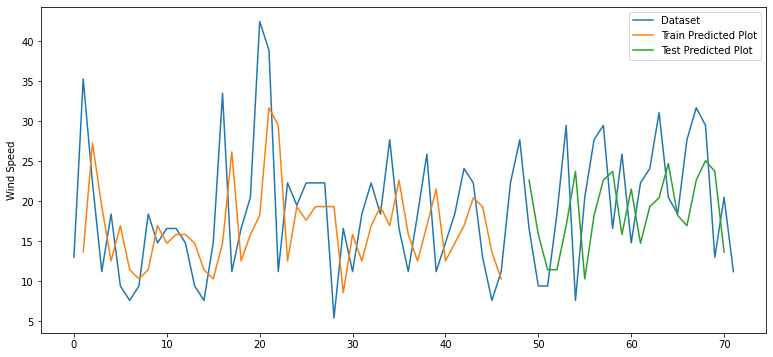

In [88]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.figure(figsize=(13,6))
y=dataframe['Wind Speed']
plt.plot()
plt.ylabel('Wind Speed')

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Dataset", "Train Predicted Plot","Test Predicted Plot"], loc ="upper right") 
plt.show()